### Import Libraries

In [ ]:
import numpy as np
import pandas as pd

### Load Dataset

In [ ]:
###Load data here###

data = pd.read_csv('data.csv')
print(data.head())

### Visualize Data

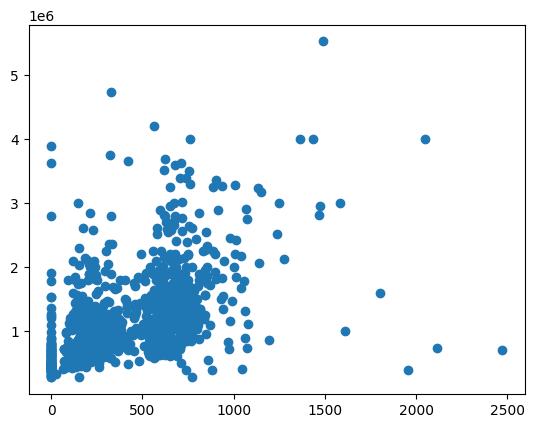

In [34]:
##Run this cell to visualize the data###
import matplotlib.pyplot as plt

plt.scatter(x=data.Area.values, y=data.Price.values)
plt.show()

### Check for Missing Values

In [35]:
###Check for Missing Data###
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Bedrooms    0
Area        0
Price       0
dtype: int64


### Perform Minmax Scaling

In [ ]:
def minmax_scaling (data, column):
    min = data[column].min()
    max = data[column].max()
    return (data[column] - min) / (max - min)

In [ ]:
data_copy = data.copy()

In [ ]:
###Apply above function on appropriate columns###
data_copy['Area'] = minmax_scaling(data_copy, 'Area')
data_copy['Price'] = minmax_scaling(data_copy, 'Price')

In [ ]:
print(data_copy.head())

### Divide Data into Training and Testing

In [36]:
def train_test_split (data_copy, ratio):
    indices = np.random.permutation(data_copy.shape[0])
    test_set_size = int(data_copy.shape[0] * ratio)
    test_indices = indices[:test_set_size]
    train_indices = indices[test_set_size:]

    return data_copy.iloc[train_indices], data_copy.iloc[test_indices]#---------------------------------------------

In [ ]:
X_train, X_test = train_test_split(data_copy[['Bedrooms', 'Area']], 0.2)
y_train, y_test = train_test_split(data_copy['Price'], 0.2)
#y_train.values.reshape(-1, 1)
#y_train.values
X_train.values


### Calculate Weights Using the Normal Equation Method (Matrix Algebra)

In [ ]:
###Use the np.linalg.inv function to compute the weight vector/array theta (Hint: @ operator in numpy)###
###You will be required to extract numpy arrays from the DataFrame (Hint: column_name.values)###
###Also, you need to reshape the arrays and merge them to create a multi-dimensional
###array in numpy, similar to a Pandas DataFrame (Hint: np.hstack)
# Extract numpy arrays from the DataFrame
X_train_array = X_train.values
y_train_array = y_train.values.reshape(-1, 1)

# Add a bias column to the feature matrix
bias_column = np.ones((X_train_array.shape[0], 1))
X_train_with_bias = np.hstack((bias_column, X_train_array))

# Compute the weight vector theta using the normal equation
theta = np.linalg.inv(X_train_with_bias.T @ X_train_with_bias) @ X_train_with_bias.T @ y_train_array
print("Theta (weights):", theta)



### Calculate Predictions on Test Set

In [ ]:
# Convert X_test to a numpy array and add a bias column
X_test_array = X_test.values
bias_column_test = np.ones((X_test_array.shape[0], 1))
X_test_with_bias = np.hstack((bias_column_test, X_test_array))

# Calculate predictions using the weight vector theta
y_pred = X_test_with_bias @ theta
print("Predictions on X_test:", y_pred)


### Calculate MSE (Evaluate Model)

In [ ]:
from sklearn.metrics import mean_squared_error

###Evaluate the regression model based on Mean Squared Error###
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

### Inverse Transform Model's Output

In [ ]:
# Transform the predictions back to the original scale
y_pred_original_scale = y_pred * (data['Price'].max() - data['Price'].min()) + data['Price'].min()
print("Predictions on original scale:", y_pred_original_scale)#---------------------------------------
# return (data[column] - min) / (max - min)

### Calcualte Weights Using Gradient Descent

In [ ]:
###Implement Batch GD to compute the weight vector theta###

#y_train = y_train.values.reshape(y_train.shape[0], 1)
theta0, theta1, theta2 = 0, 0, 0
alpha = 0.01
epochs = 100
#n = X_train.shape[0]

for i in range(epochs):
    # Compute predictions
    y_pred_gd = X_train_with_bias @ np.array([theta0, theta1, theta2]).reshape(-1, 1)

    # Compute gradients
    gradients = -(2 / X_train_with_bias.shape[0]) * (X_train_with_bias.T @ (y_train_array - y_pred_gd))

    # Update weights
    theta0 -= alpha * gradients[0, 0]
    theta1 -= alpha * gradients[1, 0]
    theta2 -= alpha * gradients[2, 0]

theta_gd = np.vstack((theta0, theta1, theta2))
theta_gd

#--------------------------------------------------



array([[0.04137529],
       [0.04178703],
       [0.00124373]])

### Calculate Predictions on Test Test

In [ ]:
###Calculate y_pred on weights from GD###
# Combine the bias column with X_test_array to create the feature matrix for prediction
X_test_with_bias_gd = np.hstack((bias_column_test, X_test.values))

# Calculate predictions using the weights from gradient descent
theta_gd = np.array([theta0, theta1, theta2]).reshape(-1, 1)
y_pred_gd = X_test_with_bias_gd @ theta_gd
print("Predictions on X_test using GD weights:", y_pred_gd)

array([[0.04162036],
       [0.04171519],
       [0.00122775]])

### Calculate MSE (Evaluate Model)

In [ ]:
###Calculate MSE on y_pred from GD###
mse_gd = mean_squared_error(y_test, y_pred_gd)
print("Mean Squared Error using GD weights:", mse_gd)


### Compare the two Approaches based on MSE ###

In [ ]:
###Which approach is more accurate?###
# Compare the two approaches based on MSE
if mse < mse_gd:
    print("The Normal Equation approach is more accurate with a lower MSE:", mse)
else:
    print("The Gradient Descent approach is more accurate with a lower MSE:", mse_gd)

# Compare the two approaches based on speed
# Normal Equation involves matrix inversion, which can be computationally expensive for large datasets
# Gradient Descent involves iterative updates, which can be slower for convergence
print("The Normal Equation approach is generally faster for smaller datasets.")
print("The Gradient Descent approach is generally better for larger datasets or when matrix inversion is computationally expensive.")
